In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'png'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2NoZXJ5bGtvdWFkaW8vRG9jdW1lbnRzL1JlcG9zaXRvcmllcy9wZXJzb25hbC13ZWJzaXRlLzNBL0FwcHJlbnRpc2FnZS1zdGF0'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/4g/2x7xwt6106l13nxqljfks4gm0000gn/T/ipykernel_32549/14405785.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap_external.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/codecs.py": 1731323889.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/aliases.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/cp437.py": 1731323905.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/__init__.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/utf_8.py": 1731323906.0, "/Library/Developer/CommandLineT

In [2]:
# Libraries
import pandas as pd 
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#!pip install umap-learn
import umap.umap_ as umap
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")

/Users/cherylkouadio/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [3]:
# Load the data
mcycle_data = pd.read_csv("Data/mcycle.csv")
mcycle_data["times"] = mcycle_data["times"]/60 
mcycle_data.describe()

,times,accel
count,133.000000,133.000000
mean,0.419649,-25.545865
std,0.218868,48.322050
min,0.040000,-134.000000
25%,0.260000,-54.900000
50%,0.390000,-13.300000
75%,0.580000,0.000000
max,0.960000,75.000000


In [4]:
# Split the data into train and test sample
X = mcycle_data[["times"]]
y = mcycle_data[["accel"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
rbf_krr_model = KernelRidge(kernel="rbf")
grid_eval = np.logspace(-2, 4, 50)
param_grid = {"alpha": grid_eval, "gamma": grid_eval}
rbf_krr_model_cv = GridSearchCV(rbf_krr_model, param_grid).fit(X_train,y_train)
print(f"Best parameters by CV : {rbf_krr_model_cv.best_params_}")

Best parameters by CV : {'alpha': np.float64(0.07196856730011521), 'gamma': np.float64(35.564803062231285)}


In [6]:
best_model = KernelRidge(kernel="rbf", alpha=rbf_krr_model_cv.best_params_["alpha"], gamma=rbf_krr_model_cv.best_params_["gamma"])
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(f"Root mean square error: {math.sqrt(mean_squared_error(y_test, y_pred)): .2f}")

Root mean square error:  22.98


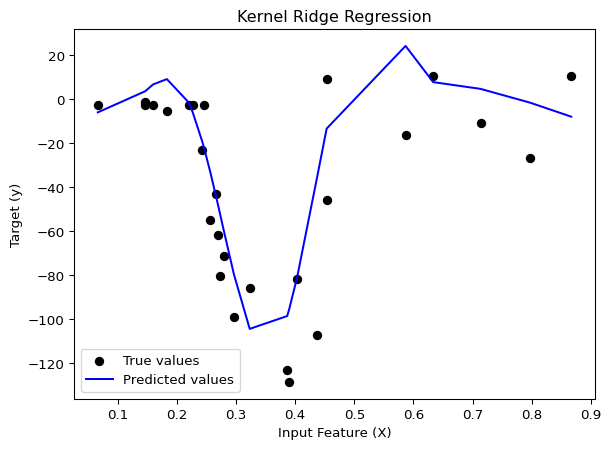

In [7]:
# Sort X_test and corresponding y_pred values
sorted_indices = np.argsort(X_test.values.flatten())
X_test_sorted = X_test.values.flatten()[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.scatter(X_test, y_test, color="black", label="True values")
plt.plot(X_test_sorted, y_pred_sorted, color="blue", label="Predicted values")
plt.title("Kernel Ridge Regression")
plt.xlabel("Input Feature (X)")
plt.ylabel("Target (y)")
plt.legend(loc="best")
plt.show()

RMSE Ridge regression :  46.17


Text(0.5, 1.0, 'Ridge Regression')

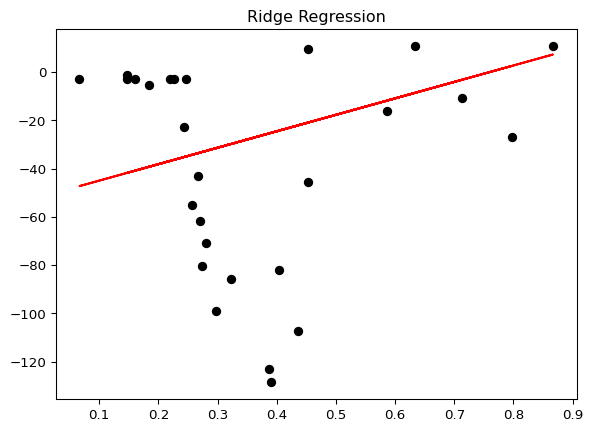

In [8]:
ridge_model = RidgeCV(alphas=grid_eval).fit(X_train, y_train)
y_pred_ridge=ridge_model.predict(X_test)
print( f'RMSE Ridge regression : {math.sqrt(mean_squared_error(y_test, y_pred_ridge)) : .2f}')

# Plot the results
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred_ridge, color="red")
plt.title("Ridge Regression")

In [9]:
# create a function that apply transformation to the features
def apply_cos(x,j):
    pi = np.pi
    return np.sqrt(2)*np.cos(j*pi*x)/(j*pi)

# perform ridge regression with cosinus modification from j = 1 to 10
X_train_cos = pd.DataFrame()
X_test_cos = pd.DataFrame()
for j in range(1,11):
    X_train_cos[f"X{j}"] = X_train["times"].apply(lambda x: apply_cos(x,j))
    X_test_cos[f"X{j}"] = X_test["times"].apply(lambda x: apply_cos(x,j))

RMSE Ridge regression with x tilde: 45.87


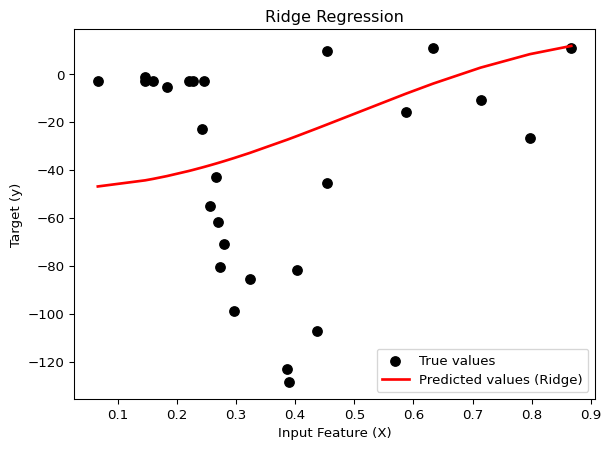

In [10]:
# Train the Ridge regression model
ridge_model1 = RidgeCV(alphas=grid_eval).fit(X_train_cos[["X1"]], y_train)
y_pred_ridge1 = ridge_model1.predict(X_test_cos[["X1"]])

rmse_ridge = math.sqrt(mean_squared_error(y_test, y_pred_ridge1))
print(f'RMSE Ridge regression with x tilde: {rmse_ridge:.2f}')
y_pred_ridge1_sorted = y_pred_ridge1[sorted_indices]

plt.scatter(X_test, y_test, color="black", label="True values", s=50)
plt.plot(X_test_sorted, y_pred_ridge1_sorted, color="red", label="Predicted values (Ridge)", linewidth=2)
plt.title("Ridge Regression")
plt.xlabel("Input Feature (X)")
plt.ylabel("Target (y)")
plt.legend(loc="best")
plt.show()

RMSE Ridge regression :  22.96


<module 'matplotlib.pyplot' from '/Users/cherylkouadio/Library/Python/3.9/lib/python/site-packages/matplotlib/pyplot.py'>

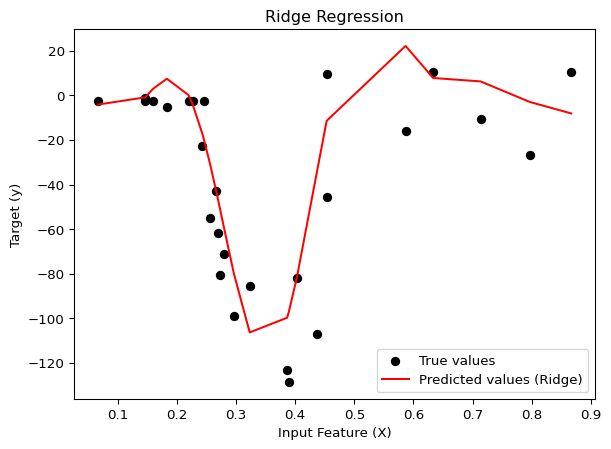

In [11]:
# New ridge with many transformated features
ridge_model2 = RidgeCV(alphas=grid_eval).fit(X_train_cos, y_train)
y_pred_ridge2 = ridge_model2.predict(X_test_cos)
y_pred_ridge2_sorted = y_pred_ridge2[sorted_indices]
print( f'RMSE Ridge regression : {math.sqrt(mean_squared_error(y_test, y_pred_ridge2)): .2f}')

# Plot the results
plt.scatter(X_test, y_test, color="black",label="True values")
plt.plot(X_test_sorted, y_pred_ridge2_sorted,color="red",label="Predicted values (Ridge)")
plt.title("Ridge Regression")
plt.xlabel("Input Feature (X)")
plt.ylabel("Target (y)")
plt.legend(loc="best")
plt

In [12]:
def sobolev_kernel(x,y):
    def B2(x):
        return x**2 - x + 1/6
    
    def B1(x):
        return x - 1/2
    
    return 1+ B2(abs(x-y)/2) + B2((x+y)/2)

In [13]:
krr_model_sobolev = KernelRidge(kernel=sobolev_kernel)
param_grid = {"alpha": grid_eval}
grid_sobolev = GridSearchCV(krr_model_sobolev, param_grid).fit(X_train,y_train)
grid_sobolev.best_params_

{'alpha': np.float64(0.07196856730011521)}

Root mean square error :  61.98


Text(0.5, 1.0, 'Sobolev Kernel Ridge Regression')

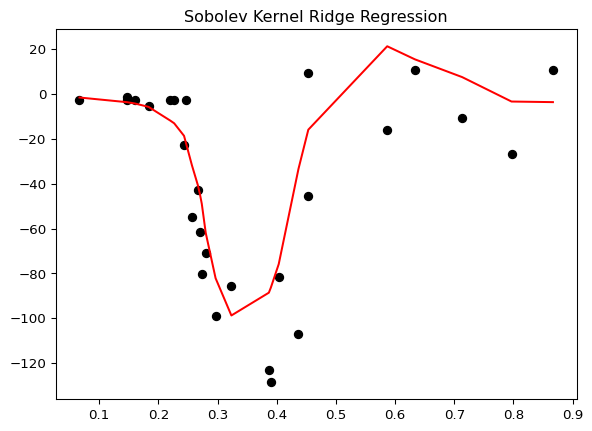

In [14]:
# compute rmse
# best_sobolev_krr = KernelRidge(kernel=sobolev_kernel, alpha=grid_sobolev.best_params_["alpha"])
# best_sobolev_krr.fit(X_train, y_train)
y_pred_sobolev = grid_sobolev.predict(X_test)
y_pred_sobolev_sorted = y_pred_sobolev[sorted_indices]
print( f'Root mean square error : {math.sqrt(mean_squared_error(y_test, y_pred_sobolev_sorted)): .2f}')


# Plot the results
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test_sorted, y_pred_sobolev_sorted,color="red")
plt.title("Sobolev Kernel Ridge Regression")

Text(0.5, 1.0, 'Two moons dataset')

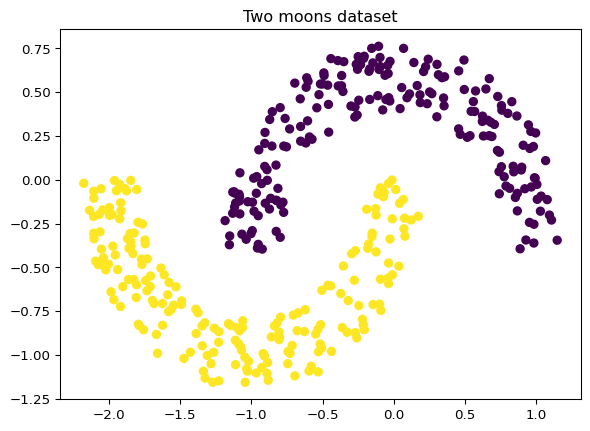

In [15]:
two_moon_data = pd.read_csv("Data/DataTwoMoons.csv",header=None)
two_moon_data.columns = ["X1","X2","y"]

plt.scatter(two_moon_data["X1"], two_moon_data["X2"], c=two_moon_data["y"])
plt.title("Two moons dataset")

In [16]:
# Split the data into train and test sample
X_train, X_test, y_train, y_test = train_test_split(two_moon_data[["X1","X2"]], two_moon_data["y"], test_size=0.2, random_state=42)

In [17]:
# KNN with cross validation

knn = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 50)}
knn_cv = GridSearchCV(knn, param_grid).fit(X_train, y_train)
print(f"Best parameters by CV : {knn_cv.best_params_}")

# Compute the accuracy
y_pred = knn_cv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix to see detailed classification performance
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best parameters by CV : {'n_neighbors': np.int64(1)}
Accuracy: 1.00
Confusion Matrix:
[[44  0]
 [ 0 36]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



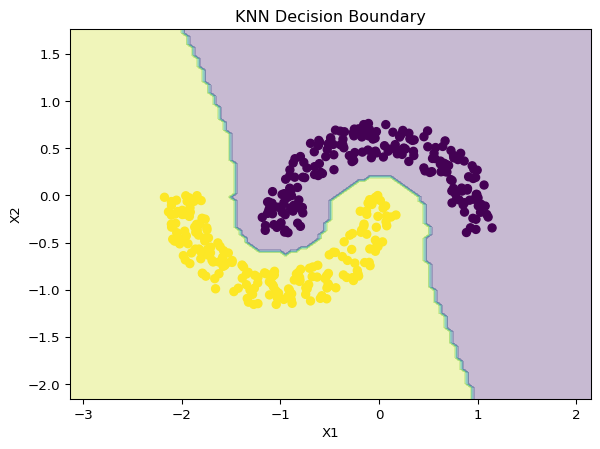

In [18]:
disp_knn = DecisionBoundaryDisplay.from_estimator(
    knn_cv,
    X_train,
    response_method="predict",
    alpha = 0.3
)
disp_knn.ax_.scatter(two_moon_data["X1"],two_moon_data["X2"], c=two_moon_data["y"])
plt.title("KNN Decision Boundary")
plt.show()

In [19]:
# compute logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix to see detailed classification performance
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.91
Confusion Matrix:
[[39  5]
 [ 2 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        44
           1       0.87      0.94      0.91        36

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



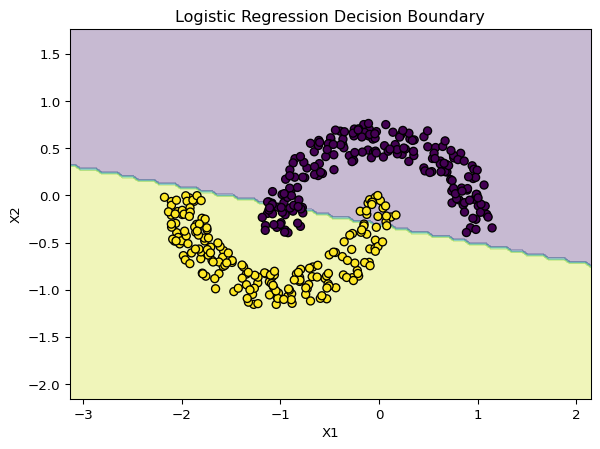

In [20]:
disp_log_reg = DecisionBoundaryDisplay.from_estimator(
    log_reg,
    X_train,
    response_method="predict",
    alpha = 0.3
)
disp_log_reg.ax_.scatter(two_moon_data["X1"],two_moon_data["X2"], c=two_moon_data["y"], edgecolor="k")
plt.title("Logistic Regression Decision Boundary")
plt.show()

In [21]:
grid_eval = np.logspace(-2, 4, 50)
param_grid = {"C": grid_eval, "gamma": grid_eval}
svm_model = SVC(kernel="rbf")
svm_model_cv = GridSearchCV(svm_model, param_grid).fit(X_train,y_train)
print(f"Best parameters by CV : {svm_model_cv.best_params_}")

Best parameters by CV : {'C': np.float64(0.030888435964774818), 'gamma': np.float64(3.727593720314938)}


In [22]:
# Compute the accuracy
y_pred = svm_model_cv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix to see detailed classification performance
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Confusion Matrix:
[[44  0]
 [ 0 36]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



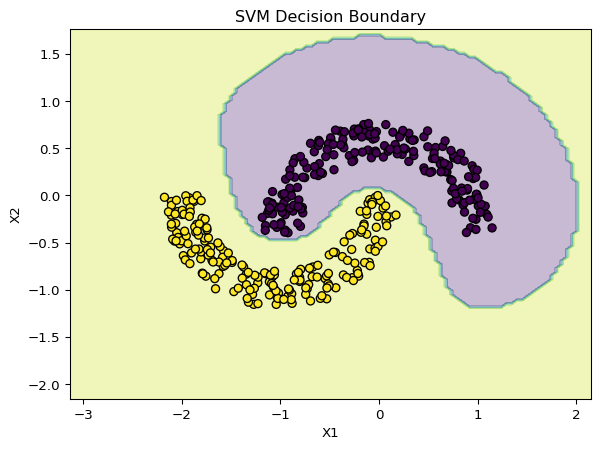

In [23]:
disp_svm = DecisionBoundaryDisplay.from_estimator(
    svm_model_cv,
    X_train,
    response_method="predict",
    alpha = 0.3
)
disp_svm.ax_.scatter(two_moon_data["X1"],two_moon_data["X2"], c=two_moon_data["y"], edgecolor="k")
plt.title("SVM Decision Boundary")
plt.show()

In [24]:
data_train = pd.read_csv("Data/mnist_train_small.csv")
data_test = pd.read_csv("Data/mnist_test.csv")

print("Description of train dataset : \n")
data_train.iloc[:,1:].describe()
data_train["label"].value_counts()

Description of train dataset : 



label
8    113
0    111
1    110
7    106
9    100
2     99
4     95
5     93
6     90
3     83
Name: count, dtype: int64

In [25]:
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train  = scaler.fit_transform(data_train.iloc[:, 1:])
y_train = data_train["label"]
X_test  = scaler.transform(data_test.iloc[:, 1:])
y_test = data_test["label"]

In [26]:
# visualize the data with UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X_train)

Text(0.5, 1.0, 'UMAP projection of the MNIST dataset')

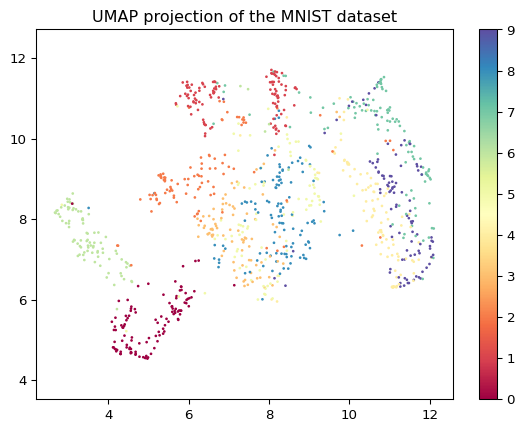

In [27]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=data_train["label"], cmap='Spectral', s=1)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar()
plt.title('UMAP projection of the MNIST dataset')

In [28]:
svm_model = SVC(kernel="rbf")
from itertools import product

grid_eval_C = [c * factor for c, factor in product([0.1, 1, 10], [1, 5])]
grid_eval_gamma = [gamma * factor for gamma, factor in product([10**-3, 10**-2, 10**-1], [1, 5])]


param_grid = {"C": grid_eval_C, "gamma": grid_eval_gamma}
svm_model_cv = GridSearchCV(svm_model, param_grid).fit(X_train, y_train)
print(f"Best parameters by CV : {svm_model_cv.best_params_}")

Best parameters by CV : {'C': 5, 'gamma': 0.001}


In [29]:
# compute the accuracy
y_pred = svm_model_cv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix to see detailed classification performance
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.88
Confusion Matrix:
[[ 931    0   20    1    1   12    9    2    4    0]
 [   0 1121    4    2    0    1    6    0    1    0]
 [  14    6  949   20    7    2    6   10   17    1]
 [   6    2   75  829    2   29    3   30   25    9]
 [   3    5   32    0  881    3    9    4    5   40]
 [   4    3   75   31    5  718   20    9   16   11]
 [  20    5  101    0    8   11  808    0    5    0]
 [   1   12   61    1   10    2    0  913    0   28]
 [   8   14   37   13   11   23    5   18  829   16]
 [   9    6   30   12   37    4    0   57    1  853]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       980
           1       0.95      0.99      0.97      1135
           2       0.69      0.92      0.79      1032
           3       0.91      0.82      0.86      1010
           4       0.92      0.90      0.91       982
           5       0.89      0.80      0.85       892
           6       0.93      0.84 

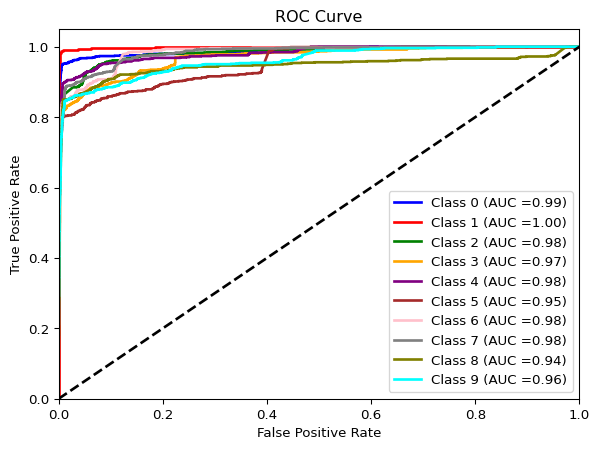

In [30]:
# plot ROC CURVE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_score = svm_model_cv.decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC ={roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()